**Aim: Implement Decsion Tree classifier**


- Implement Decision Tree classifier using scikit learn library
- Test the classifier for Weather dataset

Step 1: Import necessary libraries.

In [3]:
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

from subprocess import call

Step 2: Prepare dataset.

In [4]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

Step 3: Digitize the data set using encoding

In [5]:
# creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)

Temperature_encoded = le.fit_transform(Temperature)

Humidity_encoded = le.fit_transform(Humidity)

Wind_encoded = le.fit_transform(Wind)

Play_encoded = le.fit_transform(Play)

print("\nData After Encoding:-")
print("Weather(Outlook): " ,Outlook_encoded)
print("Temerature: " ,Temperature_encoded)
print("Humidity: " ,Humidity_encoded)
print("Wind: " ,Wind_encoded)
print("Play: " ,Play_encoded)


Data After Encoding:-
Weather(Outlook):  [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature:  [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity:  [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind:  [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play:  [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


Step 4: Merge different features to prepare dataset

In [6]:
features = tuple(zip(Outlook_encoded, Temperature_encoded, Humidity_encoded, Wind_encoded))
print(features)

((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))


Step 5: Train ’Create and Train DecisionTreeClassifier’

In [7]:
#Create a Decision Tree Classifier (using Entropy)
dtc = DecisionTreeClassifier(criterion = "entropy")

# Train the model using the training sets
dtc.fit(features, Play_encoded)   #(features, Class_label)

DecisionTreeClassifier(criterion='entropy')

Step 6: Predict Output for new data

In [14]:
#Predict Output
pred = dtc.predict([[0, 1, 1, 0],[2, 0, 0, 1], [2, 1, 1, 1]])
print("Prediction on whether play or not: ", pred)

Prediction on whether play or not:  [1 0 0]


Step 7: Display Decsion Tree Created
 
 - This step requires graphviz and tkinter packages installed

In [9]:
conda install python-graphviz

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [10]:
conda install python-tkinter

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - python-tkinter

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


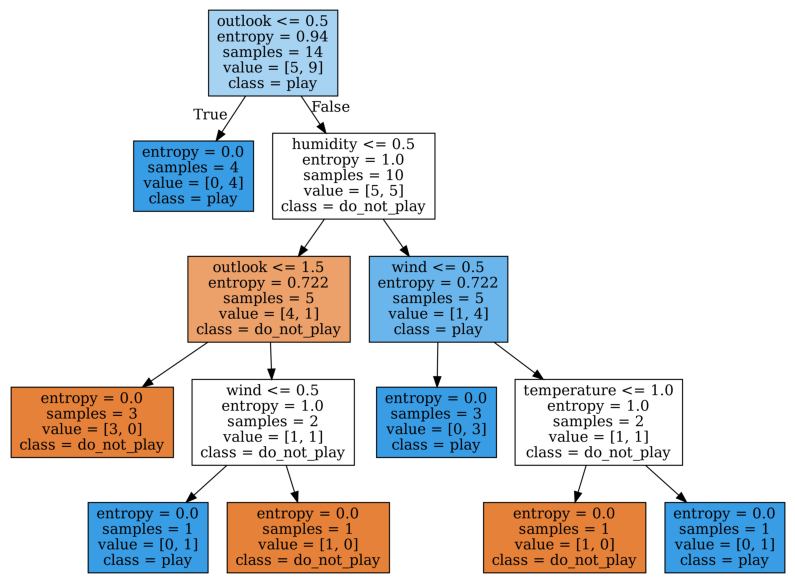

In [11]:
from sklearn.tree import export_graphviz
export_graphviz(dtc,out_file='tree_entropy.dot',
               feature_names=['outlook','temperature','humidity','wind'],
               class_names=['do_not_play','play'], 
               filled=True)

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

# Display in python
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();